In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#****Data Preprocessing****

In [30]:
cr=pd.read_csv('car data.csv')

In [31]:
cr

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [32]:
cr.shape

(301, 9)

In [33]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [34]:
cr.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [35]:
#Checking for missing values 
cr.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [36]:
#Checking for duplicated records
cr.duplicated().sum()

2

In [37]:
#Dropping the duplicated records
cr.drop_duplicates(inplace=True)
cr.duplicated().sum()

0

In [38]:
cr.shape

(299, 9)

#****EDA(Exploratory Data Analysis)****

In [39]:
cr.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.234369,-0.053167,-0.525714,-0.181639
Selling_Price,0.234369,1.000000,0.876305,0.028566,-0.087880
Present_Price,-0.053167,0.876305,1.000000,0.205224,0.009948
Driven_kms,-0.525714,0.028566,0.205224,1.000000,0.089367
Owner,-0.181639,-0.087880,0.009948,0.089367,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

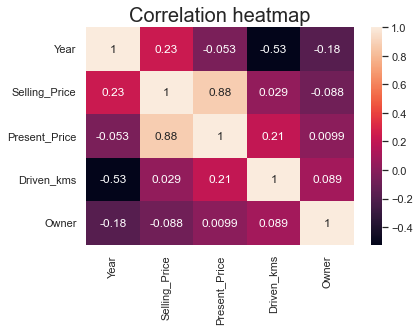

In [40]:
sns.heatmap(cr.corr(),annot=True)
plt.title('Correlation heatmap',fontsize=20)

Text(0.5, 1.0, 'Present price vs Selling price')

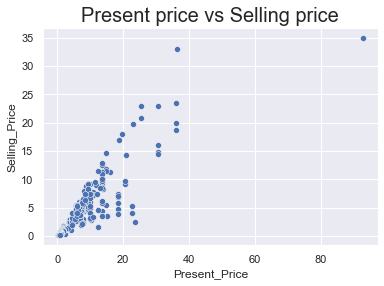

In [41]:
sns.scatterplot(x=cr['Present_Price'],y=cr['Selling_Price'])
plt.title('Present price vs Selling price',fontsize=20)

In [42]:
#Counting the number of owners belonging to each class
cr['Owner'].value_counts()

0    288
1     10
3      1
Name: Owner, dtype: int64

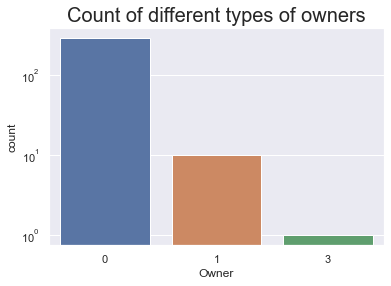

In [43]:
sns.countplot(x=cr['Owner'],data=cr)
plt.title('Count of different types of owners',fontsize=20)
plt.yscale('log') 

In [44]:
#Counting the number of people belonging to each of the following classes
cr['Selling_type'].value_counts()

Dealer        193
Individual    106
Name: Selling_type, dtype: int64

Text(0.5, 1.0, 'People belonging to different selling types')

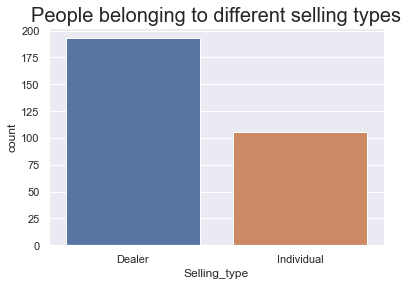

In [45]:
sns.countplot(x=cr['Selling_type'],data=cr)
plt.title('People belonging to different selling types',fontsize=20)

In [46]:
#Counting the total number of different types of Fuel type
cr['Fuel_Type'].value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

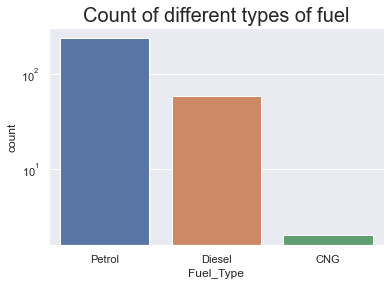

In [47]:
sns.countplot(x=cr['Fuel_Type'],data=cr)
plt.title('Count of different types of fuel',fontsize=20)
plt.yscale('log')

In [48]:
#Counting the values of different transmission types
cr['Transmission'].value_counts()

Manual       260
Automatic     39
Name: Transmission, dtype: int64

Text(0.5, 1.0, 'Count of different transmission types')

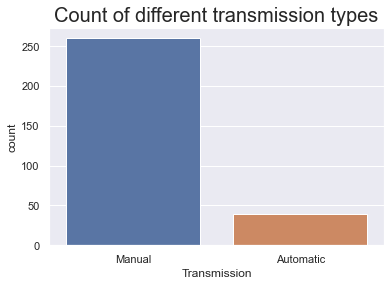

In [49]:
sns.countplot(x=cr['Transmission'],data=cr)
plt.title('Count of different transmission types',fontsize=20)

In [50]:
#Checking the number of different car names
cr['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

#****Model Building****

In [51]:
cr=pd.get_dummies(cr,columns=['Fuel_Type','Selling_type','Transmission'])
cr

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,sx4,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,swift,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,0,1,0,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,0,1,1,0,0,1
298,city,2009,3.35,11.00,87934,0,0,0,1,1,0,0,1
299,city,2017,11.50,12.50,9000,0,0,1,0,1,0,0,1


In [52]:
#Separating the input features and traget variable
y=cr['Selling_Price'].values
X=cr.drop(columns=['Car_Name','Selling_Price'],axis=1).values

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=300)

In [54]:
#Implementing multiple Linear Regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

#****Model Evaluation****

In [55]:
#Predicting the Selling price based on our model
y_pred=lr.predict(X_test)

In [56]:
#MeanSquarederror and R2 score
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
from math import sqrt
rmse=sqrt(mse)
print('Root mean squared error:',rmse)
print('R2 score:',r2_score(y_pred,y_test))

Root mean squared error: 1.521143704041483
R2 score: 0.85933750156916


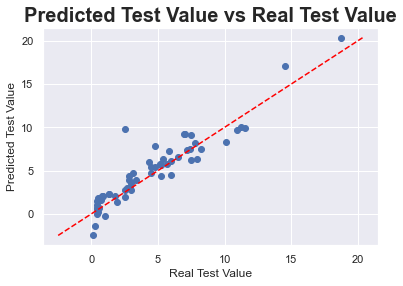

In [57]:
#Plotting a graph for the predicted test value and Real test value
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.scatter(y_test, y_pred)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.xlabel("Real Test Value")
plt.ylabel("Predicted Test Value")
plt.title("Predicted Test Value vs Real Test Value", fontsize = 20, fontweight='bold')
plt.show()
